<a href="https://colab.research.google.com/github/nerdyvyoma136/CustomerSegmentation/blob/main/Vyoma_Imarticus_Ecom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Segmentation with RFM analysis and Clustering**

**Importing Important Libraries**

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from datetime import *
from dateutil.parser import parse
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth
from sklearn.decomposition import PCA

In [2]:
#Loading a dataset
df = pd.read_excel('E-com_Data.xlsx')
df.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422,2017-10-12,2,14:53:00,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633,2017-08-22,3,14:47:00,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422,2017-10-10,2,14:53:00,944.0,1888.0,Location 1,NaN,NaN,NaN


# **Data Preprocessing**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537979 entries, 0 to 537978
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   CustomerID         404189 non-null  float64       
 1   Item Code          537979 non-null  object        
 2   InvoieNo           537979 non-null  int64         
 3   Date of purchase   537979 non-null  datetime64[ns]
 4   Quantity           537979 non-null  int64         
 5   Time               537979 non-null  object        
 6   price per Unit     537979 non-null  float64       
 7   Price              537979 non-null  float64       
 8   Shipping Location  537979 non-null  object        
 9   Cancelled_status   8345 non-null    float64       
 10  Reason of return   3 non-null       object        
 11  Sold as set        0 non-null       float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(4)
memory usage: 49.3+ MB


Dropping Sold as Set column because of 0 non-null values

In [4]:
df = df.drop(['Sold as set'], axis=1)
df.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return
0,4355.0,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1,NaN,NaN
1,4352.0,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1,NaN,NaN
2,4352.0,14614,394422,2017-10-12,2,14:53:00,933.0,1866.0,Location 1,NaN,NaN
3,4352.0,85014B,388633,2017-08-22,3,14:47:00,623.0,1869.0,Location 1,NaN,NaN
4,4352.0,15364,394422,2017-10-10,2,14:53:00,944.0,1888.0,Location 1,NaN,NaN


Checking 3 non-null rows of return of reason column

In [5]:
bool_series = pd.notnull(df['Reason of return'])
df[bool_series]

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return
411295,NaN,14105,390366,2017-09-05,-156,12:16:00,34.0,-5304.0,Location 36,NaN,display
411455,NaN,72807C,403542,2017-11-26,-428,12:45:00,7.0,-2996.0,Location 36,NaN,Missing
411612,NaN,72807B,403540,2017-11-29,-124,12:45:00,15.0,-1860.0,Location 36,NaN,Missing


Considering CustomerID as important column subsetting whole dataframe and dropping rows where it is null

In [6]:
df = df.dropna(subset=['CustomerID'])

In [7]:
df['CustomerID'] = df['CustomerID'].astype(int)
df['Quantity'] = df['Quantity'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404189 entries, 0 to 537949
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   CustomerID         404189 non-null  int64         
 1   Item Code          404189 non-null  object        
 2   InvoieNo           404189 non-null  int64         
 3   Date of purchase   404189 non-null  datetime64[ns]
 4   Quantity           404189 non-null  int64         
 5   Time               404189 non-null  object        
 6   price per Unit     404189 non-null  float64       
 7   Price              404189 non-null  float64       
 8   Shipping Location  404189 non-null  object        
 9   Cancelled_status   8183 non-null    float64       
 10  Reason of return   0 non-null       object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 37.0+ MB


In [8]:
df = df.drop(['Reason of return'], axis=1)
df.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status
0,4355,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1,NaN
1,4352,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1,NaN
2,4352,14614,394422,2017-10-12,2,14:53:00,933.0,1866.0,Location 1,NaN
3,4352,85014B,388633,2017-08-22,3,14:47:00,623.0,1869.0,Location 1,NaN
4,4352,15364,394422,2017-10-10,2,14:53:00,944.0,1888.0,Location 1,NaN


In [9]:
#Checking non-null values of Cancelled Status
bool_series = pd.notnull(df['Cancelled_status'])
df[bool_series]

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status
6,4343,15364,368432,2017-02-13,-4,14:46:00,922.0,-3688.0,Location 1,1.0
31,4325,14619,366771,2017-01-31,-1,11:07:00,179.0,-179.0,Location 1,1.0
121,4107,15364,364641,2016-12-21,-1,12:41:00,885.0,-885.0,Location 1,1.0
153,4043,85014B,387837,2017-08-10,-1,12:18:00,694.0,-694.0,Location 1,1.0
252,3951,14614,384727,2017-07-20,-1,13:33:00,943.0,-943.0,Location 1,1.0
...,...,...,...,...,...,...,...,...,...,...
537854,3802,14693,377012,2017-05-06,-1,11:21:00,382.0,-382.0,Location 8,1.0
537866,3309,85194L,372168,2017-03-31,-8,11:02:00,122.0,-976.0,Location 8,1.0
537867,3309,85194L,372305,2017-03-28,-8,16:34:00,106.0,-848.0,Location 8,1.0
537898,1633,14693,393042,2017-09-24,-2,10:40:00,394.0,-788.0,Location 8,1.0


In [10]:
#Replacing NaN values of Cancelled_Status with 0
df['Cancelled_status'] = df['Cancelled_status'].replace(np.nan, 0)
df.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status
0,4355,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1,0.0
1,4352,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1,0.0
2,4352,14614,394422,2017-10-12,2,14:53:00,933.0,1866.0,Location 1,0.0
3,4352,85014B,388633,2017-08-22,3,14:47:00,623.0,1869.0,Location 1,0.0
4,4352,15364,394422,2017-10-10,2,14:53:00,944.0,1888.0,Location 1,0.0


In [11]:
#Converting float values to int
df['Cancelled_status'] = df['Cancelled_status'].astype(int)
df.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status
0,4355,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1,0
1,4352,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1,0
2,4352,14614,394422,2017-10-12,2,14:53:00,933.0,1866.0,Location 1,0
3,4352,85014B,388633,2017-08-22,3,14:47:00,623.0,1869.0,Location 1,0
4,4352,15364,394422,2017-10-10,2,14:53:00,944.0,1888.0,Location 1,0


In [12]:
#Concatenating Date and Time
df['Date_Time'] = df['Date of purchase'].astype(str) +" "+df['Time'].astype(str)
df.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Date_Time
0,4355,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1,0,2017-10-29 15:36:00
1,4352,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1,0,2017-10-05 14:53:00
2,4352,14614,394422,2017-10-12,2,14:53:00,933.0,1866.0,Location 1,0,2017-10-12 14:53:00
3,4352,85014B,388633,2017-08-22,3,14:47:00,623.0,1869.0,Location 1,0,2017-08-22 14:47:00
4,4352,15364,394422,2017-10-10,2,14:53:00,944.0,1888.0,Location 1,0,2017-10-10 14:53:00


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404189 entries, 0 to 537949
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   CustomerID         404189 non-null  int64         
 1   Item Code          404189 non-null  object        
 2   InvoieNo           404189 non-null  int64         
 3   Date of purchase   404189 non-null  datetime64[ns]
 4   Quantity           404189 non-null  int64         
 5   Time               404189 non-null  object        
 6   price per Unit     404189 non-null  float64       
 7   Price              404189 non-null  float64       
 8   Shipping Location  404189 non-null  object        
 9   Cancelled_status   404189 non-null  int64         
 10  Date_Time          404189 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(4)
memory usage: 37.0+ MB


In [14]:
#Converting object type of Date_Time to datetime type
df['Date_Time'] = pd.to_datetime(df['Date_Time'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404189 entries, 0 to 537949
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   CustomerID         404189 non-null  int64         
 1   Item Code          404189 non-null  object        
 2   InvoieNo           404189 non-null  int64         
 3   Date of purchase   404189 non-null  datetime64[ns]
 4   Quantity           404189 non-null  int64         
 5   Time               404189 non-null  object        
 6   price per Unit     404189 non-null  float64       
 7   Price              404189 non-null  float64       
 8   Shipping Location  404189 non-null  object        
 9   Cancelled_status   404189 non-null  int64         
 10  Date_Time          404189 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(4), object(3)
memory usage: 37.0+ MB


In [15]:
#Creating extra columns for EDA purpose
df['Year'] = df['Date_Time'].dt.year
df['Month'] = df['Date_Time'].dt.month
df['Day'] = df['Date_Time'].dt.day
df['Weekday'] = df['Date_Time'].dt.day_name()
df['Hour'] = df['Date_Time'].dt.hour
df['Minute'] = df['Date_Time'].dt.minute

In [16]:
df.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Date_Time,Year,Month,Day,Weekday,Hour,Minute
0,4355,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1,0,2017-10-29 15:36:00,2017,10,29,Sunday,15,36
1,4352,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1,0,2017-10-05 14:53:00,2017,10,5,Thursday,14,53
2,4352,14614,394422,2017-10-12,2,14:53:00,933.0,1866.0,Location 1,0,2017-10-12 14:53:00,2017,10,12,Thursday,14,53
3,4352,85014B,388633,2017-08-22,3,14:47:00,623.0,1869.0,Location 1,0,2017-08-22 14:47:00,2017,8,22,Tuesday,14,47
4,4352,15364,394422,2017-10-10,2,14:53:00,944.0,1888.0,Location 1,0,2017-10-10 14:53:00,2017,10,10,Tuesday,14,53


In [17]:
df['Item Code'].value_counts()

85123A    2064
14846     1867
85099B    1649
77302     1415
39989     1413
          ... 
77196        1
77532        1
77549        1
77169        1
90024D       1
Name: Item Code, Length: 3659, dtype: int64

In [18]:
df['Item Code'].value_counts().mean()

110.46433451762776

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,404189.0,2181.909035,1252.681881,2.0,1207.0,2078.0,3291.0,4372.0
InvoieNo,404189.0,385648.404551,13107.422150,361429.0,374194.0,386937.0,397130.0,406651.0
Quantity,404189.0,11.478576,29.489655,-152.0,2.0,5.0,12.0,3186.0
price per Unit,404189.0,341.448120,427.238546,2.0,158.0,238.0,407.0,64973.0
Price,404189.0,2474.108531,4891.346420,-10152.0,555.0,1572.0,2492.0,90400.0
Cancelled_status,404189.0,0.020245,0.140839,0.0,0.0,0.0,0.0,1.0
Year,404189.0,2016.934236,0.247869,2016.0,2017.0,2017.0,2017.0,2017.0
Month,404189.0,7.763205,3.419190,1.0,5.0,9.0,11.0,12.0
Day,404189.0,15.686280,8.544495,1.0,9.0,15.0,23.0,31.0
Hour,404189.0,12.738449,2.282918,6.0,11.0,13.0,14.0,20.0


# **Exploratory Data Analysis**

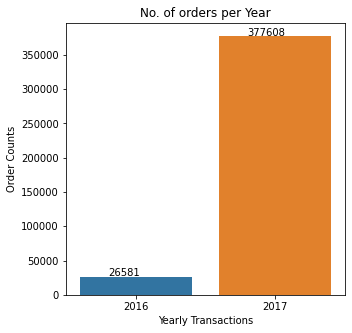

In [20]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x=df['Year'], data=df)
plt.title("No. of orders per Year")
plt.xlabel('Yearly Transactions')
plt.ylabel('Order Counts')
for p in ax.patches:
        ax.annotate('{:d}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+700))

The above barplot of year showcases that majorly the transactions of order happened in the year **2017**.

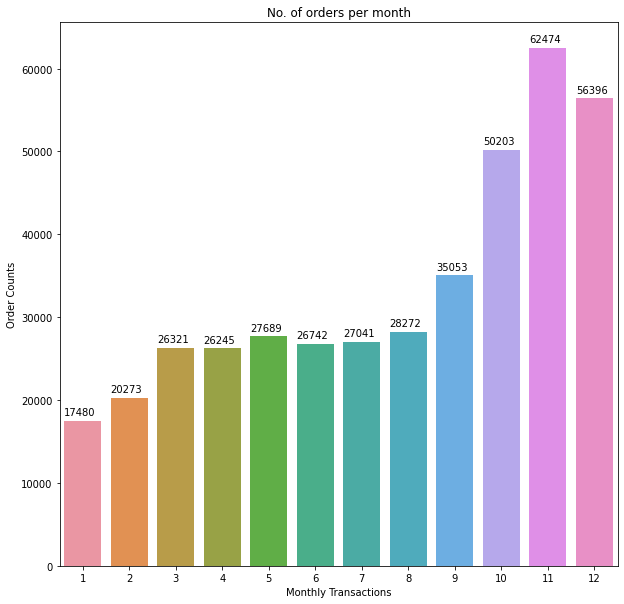

In [21]:
plt.figure(figsize=(10,10))
ax = sns.countplot(x=df['Month'], data=df)
plt.title("No. of orders per month")
plt.xlabel('Monthly Transactions')
plt.ylabel('Order Counts')
for p in ax.patches:
        ax.annotate('{:d}'.format(p.get_height()), (p.get_x()+0.0, p.get_height()+700))

The above plot for monthly transactions summarizes the facts that the **last 3 months of year were mostly engaged by customers**, where **November** being at the first place.

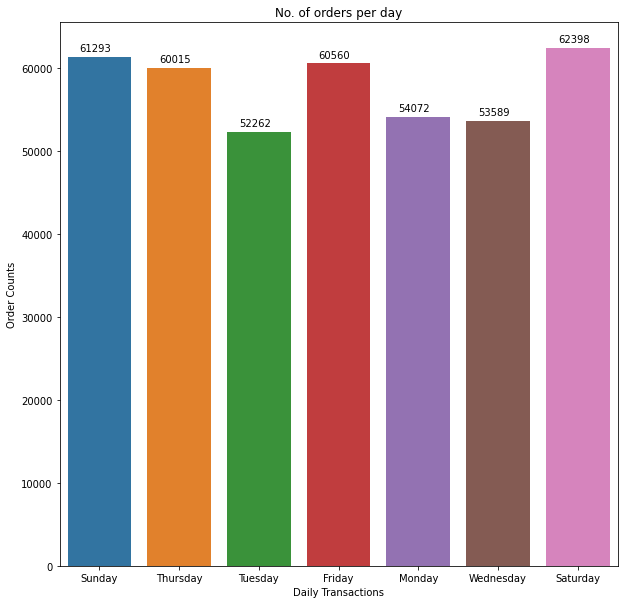

In [22]:
plt.figure(figsize=(10,10))
ax = sns.countplot(x=df['Weekday'], data=df)
plt.title("No. of orders per day")
plt.xlabel('Daily Transactions')
plt.ylabel('Order Counts')
for p in ax.patches:
        ax.annotate('{:d}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+700))

From the above barplots for daily transcations, it seemed that **last 3 days of weeks** were the most preferrable choice of customers to place an order. **Sunday** being at top position.

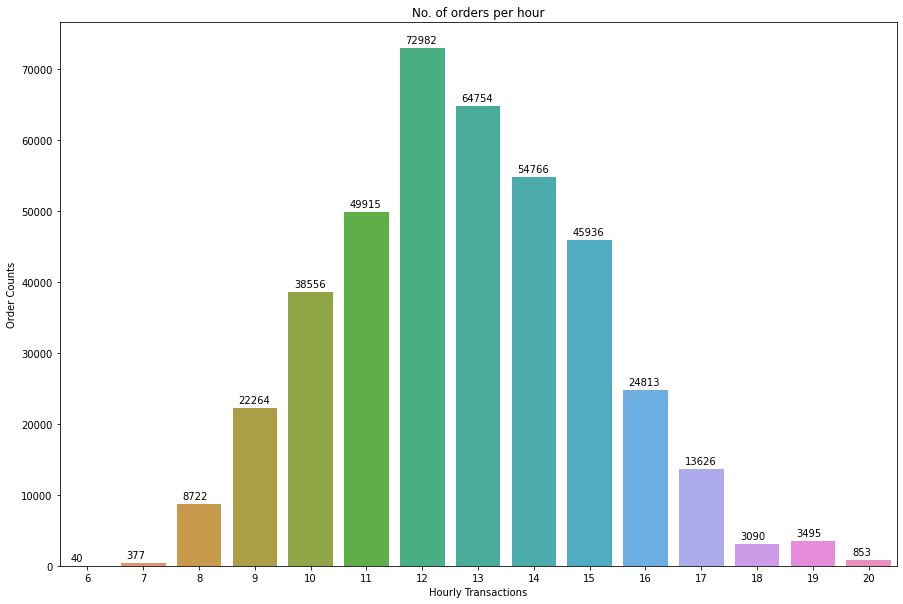

In [23]:
plt.figure(figsize=(15,10))
ax = sns.countplot(x=df['Hour'], data=df)
plt.title("No. of orders per hour")
plt.xlabel('Hourly Transactions')
plt.ylabel('Order Counts')
for p in ax.patches:
        ax.annotate('{:d}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+700))

Out of the 24 hours in a day, the **peak hours** for transactions were **12 to 2 pm.**

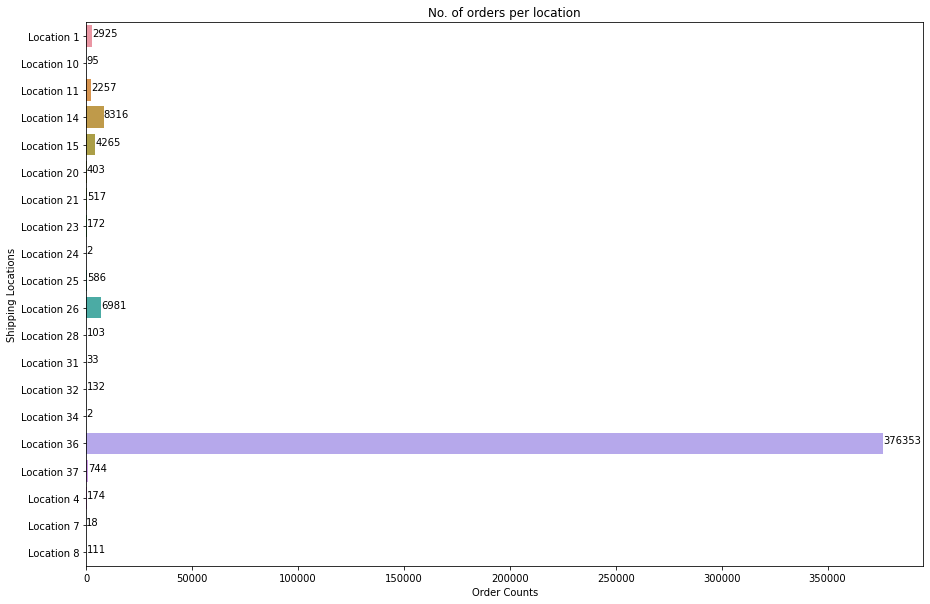

In [24]:
plt.figure(figsize=(15,10))
ax = sns.countplot(y=df['Shipping Location'], data=df)
plt.title("No. of orders per location")
plt.ylabel('Shipping Locations')
plt.xlabel('Order Counts')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
total = len(df['Shipping Location'])
for p in ax.patches:
        values = '{:.0f}'.format(p.get_width())
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(values, (x, y))

plt.show()

This horizontal plot says that mostly the **ecommerce company** should target the location where the transactions are happened more, which was **Location 36**.

In [25]:
#Checking Customers with their order frequency
df['CustomerID'].value_counts()

4043    7971
1896    5874
1301    5099
331     4615
1675    2779
        ... 
4296       1
372        1
2746       1
4262       1
3436       1
Name: CustomerID, Length: 4349, dtype: int64

In [26]:
#Creating a dataframe for Shipping Location == Location 36
lc_36_data = df[df['Shipping Location']=='Location 36']

In [27]:
lc_36_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376353 entries, 34831 to 411183
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   CustomerID         376353 non-null  int64         
 1   Item Code          376353 non-null  object        
 2   InvoieNo           376353 non-null  int64         
 3   Date of purchase   376353 non-null  datetime64[ns]
 4   Quantity           376353 non-null  int64         
 5   Time               376353 non-null  object        
 6   price per Unit     376353 non-null  float64       
 7   Price              376353 non-null  float64       
 8   Shipping Location  376353 non-null  object        
 9   Cancelled_status   376353 non-null  int64         
 10  Date_Time          376353 non-null  datetime64[ns]
 11  Year               376353 non-null  int64         
 12  Month              376353 non-null  int64         
 13  Day                376353 non-null  int6

In [28]:
#Dropping unnecessary columns for better evaluation
lc_36_data = lc_36_data.drop(['Year', 'Month', 'Day', 'Weekday', 'Hour', 'Minute', 
                              'Date of purchase', 'Time', 'Shipping Location'], axis=1)
lc_36_data.head()

,CustomerID,Item Code,InvoieNo,Quantity,price per Unit,Price,Cancelled_status,Date_Time
34831,4372,39845,395779,24,45.0,1080.0,0,2017-10-14 10:23:00
34832,4372,15178,379129,12,92.0,1104.0,0,2017-06-01 10:39:00
34833,4372,15177,379129,12,98.0,1176.0,0,2017-05-25 10:39:00
34834,4372,14844,395779,12,106.0,1272.0,0,2017-10-17 10:23:00
34835,4372,15801,395779,24,53.0,1272.0,0,2017-10-15 10:23:00


In [29]:
lc_36_data.reset_index(drop=True)

,CustomerID,Item Code,InvoieNo,Quantity,price per Unit,Price,Cancelled_status,Date_Time
0,4372,39845,395779,24,45.0,1080.0,0,2017-10-14 10:23:00
1,4372,15178,379129,12,92.0,1104.0,0,2017-06-01 10:39:00
2,4372,15177,379129,12,98.0,1176.0,0,2017-05-25 10:39:00
3,4372,14844,395779,12,106.0,1272.0,0,2017-10-17 10:23:00
4,4372,15801,395779,24,53.0,1272.0,0,2017-10-15 10:23:00
...,...,...,...,...,...,...,...,...
376348,2,15507,398575,48,202.0,9696.0,0,2017-11-10 12:25:00
376349,2,15739,387096,12,868.0,10416.0,0,2017-08-05 08:48:00
376350,2,84558A,387096,36,306.0,11016.0,0,2017-08-05 08:48:00
376351,2,84558A,398575,36,346.0,12456.0,0,2017-11-04 12:25:00


In [30]:
lc_36_data.describe()

,CustomerID,InvoieNo,Quantity,price per Unit,Price,Cancelled_status
count,376353.000000,376353.000000,376353.000000,376353.000000,376353.000000,376353.000000
mean,2188.846756,385666.911009,11.336995,341.776495,2462.096729,0.019971
std,1249.629719,13085.329557,28.861827,426.729007,4842.747325,0.139899
min,2.000000,361429.000000,-152.000000,2.000000,-10104.000000,0.000000
25%,1217.000000,374321.000000,2.000000,158.000000,553.000000,0.000000
50%,2080.000000,386933.000000,5.000000,238.000000,1564.000000,0.000000
75%,3294.000000,397130.000000,12.000000,410.000000,2480.000000,0.000000
max,4372.000000,406651.000000,3186.000000,64973.000000,90400.000000,1.000000


In [31]:
lc_36_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376353 entries, 34831 to 411183
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   CustomerID        376353 non-null  int64         
 1   Item Code         376353 non-null  object        
 2   InvoieNo          376353 non-null  int64         
 3   Quantity          376353 non-null  int64         
 4   price per Unit    376353 non-null  float64       
 5   Price             376353 non-null  float64       
 6   Cancelled_status  376353 non-null  int64         
 7   Date_Time         376353 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(4), object(1)
memory usage: 25.8+ MB


In [32]:
lc_36_data.shape

(376353, 8)

In [33]:
#A function unique_counts to know the unique values for each columns in location 36 data
def unique_counts(lc_36_data):
   for i in lc_36_data.columns:
       count = lc_36_data[i].nunique()
       print(i, ": ", count)
unique_counts(lc_36_data)

CustomerID :  4347
Item Code :  3479
InvoieNo :  21364
Quantity :  257
price per Unit :  2575
Price :  12948
Cancelled_status :  2
Date_Time :  93306


In [34]:
lc_36_data['Date_Time'].max()

Timestamp('2017-12-19 12:50:00')

In [35]:
lc_36_data['Date_Time'].min()

Timestamp('2016-12-02 08:34:00')

In [36]:
#For calculation Recency setting current date as 1 day ahead of maximum date in lc_36_data
import datetime as dt
current_date = dt.datetime(2017,12,20)

In [37]:
lc_36_data['Date_Time'] = pd.to_datetime(lc_36_data['Date_Time'])
lc_36_data.head()

,CustomerID,Item Code,InvoieNo,Quantity,price per Unit,Price,Cancelled_status,Date_Time
34831,4372,39845,395779,24,45.0,1080.0,0,2017-10-14 10:23:00
34832,4372,15178,379129,12,92.0,1104.0,0,2017-06-01 10:39:00
34833,4372,15177,379129,12,98.0,1176.0,0,2017-05-25 10:39:00
34834,4372,14844,395779,12,106.0,1272.0,0,2017-10-17 10:23:00
34835,4372,15801,395779,24,53.0,1272.0,0,2017-10-15 10:23:00


In [38]:
lc_36_data = lc_36_data.reset_index(drop=True)
lc_36_data.head()

,CustomerID,Item Code,InvoieNo,Quantity,price per Unit,Price,Cancelled_status,Date_Time
0,4372,39845,395779,24,45.0,1080.0,0,2017-10-14 10:23:00
1,4372,15178,379129,12,92.0,1104.0,0,2017-06-01 10:39:00
2,4372,15177,379129,12,98.0,1176.0,0,2017-05-25 10:39:00
3,4372,14844,395779,12,106.0,1272.0,0,2017-10-17 10:23:00
4,4372,15801,395779,24,53.0,1272.0,0,2017-10-15 10:23:00


**RFM Analysis**

In [39]:
rfm= lc_36_data.groupby('CustomerID').agg({'Date_Time': lambda date: (current_date - date.max()).days,
                                        'InvoieNo': lambda num: len(num),
                                        'Price': lambda price: price.sum()})
rfm.columns

Index(['Date_Time', 'InvoieNo', 'Price'], dtype='object')

In [40]:
rfm.columns=['Recency','Frequency','Monetary']

In [41]:
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
2,3,149,459974.0
3,76,24,218956.0
4,18,64,158562.0
5,310,16,41976.0
6,36,79,144226.0


In [42]:
#Checking details of Customer ID=2 
fc = lc_36_data[lc_36_data['CustomerID']==2]
fc

,CustomerID,Item Code,InvoieNo,Quantity,price per Unit,Price,Cancelled_status,Date_Time
376204,2,8431,374286,24,26.0,624.0,0,2017-04-17 10:43:00
376205,2,15244,374286,12,66.0,792.0,0,2017-04-13 10:43:00
376206,2,13142,387096,10,99.0,990.0,0,2017-08-11 08:48:00
376207,2,15368,398575,12,95.0,1140.0,0,2017-11-06 12:25:00
376208,2,14059,398575,12,96.0,1152.0,0,2017-11-08 12:25:00
...,...,...,...,...,...,...,...,...
376348,2,15507,398575,48,202.0,9696.0,0,2017-11-10 12:25:00
376349,2,15739,387096,12,868.0,10416.0,0,2017-08-05 08:48:00
376350,2,84558A,387096,36,306.0,11016.0,0,2017-08-05 08:48:00
376351,2,84558A,398575,36,346.0,12456.0,0,2017-11-04 12:25:00


In [43]:
fc[fc['Cancelled_status']==0]

,CustomerID,Item Code,InvoieNo,Quantity,price per Unit,Price,Cancelled_status,Date_Time
376204,2,8431,374286,24,26.0,624.0,0,2017-04-17 10:43:00
376205,2,15244,374286,12,66.0,792.0,0,2017-04-13 10:43:00
376206,2,13142,387096,10,99.0,990.0,0,2017-08-11 08:48:00
376207,2,15368,398575,12,95.0,1140.0,0,2017-11-06 12:25:00
376208,2,14059,398575,12,96.0,1152.0,0,2017-11-08 12:25:00
...,...,...,...,...,...,...,...,...
376348,2,15507,398575,48,202.0,9696.0,0,2017-11-10 12:25:00
376349,2,15739,387096,12,868.0,10416.0,0,2017-08-05 08:48:00
376350,2,84558A,387096,36,306.0,11016.0,0,2017-08-05 08:48:00
376351,2,84558A,398575,36,346.0,12456.0,0,2017-11-04 12:25:00


In [44]:
lc_36_data[lc_36_data['CustomerID']==1896]

,CustomerID,Item Code,InvoieNo,Quantity,price per Unit,Price,Cancelled_status,Date_Time
205302,1896,15487,395895,-2,5031.0,-10062.0,1,2017-10-18 13:25:00
205303,1896,15595,387439,-48,208.0,-9984.0,1,2017-08-14 14:46:00
205304,1896,15593,387439,-48,204.0,-9792.0,1,2017-08-12 14:46:00
205305,1896,15365,364285,-10,933.0,-9330.0,1,2016-12-18 12:56:00
205306,1896,15403,387439,-48,192.0,-9216.0,1,2017-08-07 14:46:00
...,...,...,...,...,...,...,...,...
210697,1896,15373,387438,288,177.0,50976.0,0,2017-08-14 14:40:00
210698,1896,14311,390277,144,391.0,56304.0,0,2017-09-07 17:19:00
210699,1896,14689,397001,640,97.0,62080.0,0,2017-10-25 09:28:00
210700,1896,15333,386709,200,314.0,62800.0,0,2017-08-06 15:16:00


In [45]:
#Resetting CustomerID index as column again
rfm = rfm.rename_axis('CustomerID').reset_index()
rfm

,CustomerID,Recency,Frequency,Monetary
0,2,3,149,459974.0
1,3,76,24,218956.0
2,4,18,64,158562.0
3,5,310,16,41976.0
4,6,36,79,144226.0
...,...,...,...,...
4342,4368,277,9,18916.0
4343,4369,180,7,10774.0
4344,4370,8,11,19465.0
4345,4371,3,687,259701.0


In [46]:
rfm.columns

Index(['CustomerID', 'Recency', 'Frequency', 'Monetary'], dtype='object')

In [47]:
rfm.describe()

,CustomerID,Recency,Frequency,Monetary
count,4347.000000,4347.000000,4347.000000,4.347000e+03
mean,2186.350587,92.505176,86.577640,2.131625e+05
std,1261.302293,100.829325,215.565898,7.729048e+05
min,2.000000,0.000000,1.000000,-4.442600e+04
25%,1094.500000,17.000000,16.000000,3.523500e+04
50%,2185.000000,50.000000,39.000000,7.826000e+04
75%,3278.500000,143.500000,95.000000,1.932235e+05
max,4372.000000,380.000000,7383.000000,3.077583e+07


In [48]:
rfm.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,CustomerID,Recency,Frequency,Monetary
count,4347.00,4347.00,4347.00,4347.00
mean,2186.35,92.51,86.58,213162.52
std,1261.30,100.83,215.57,772904.81
min,2.00,0.00,1.00,-44426.00
25%,1094.50,17.00,16.00,35235.00
50%,2185.00,50.00,39.00,78260.00
75%,3278.50,143.50,95.00,193223.50
max,4372.00,380.00,7383.00,30775830.00


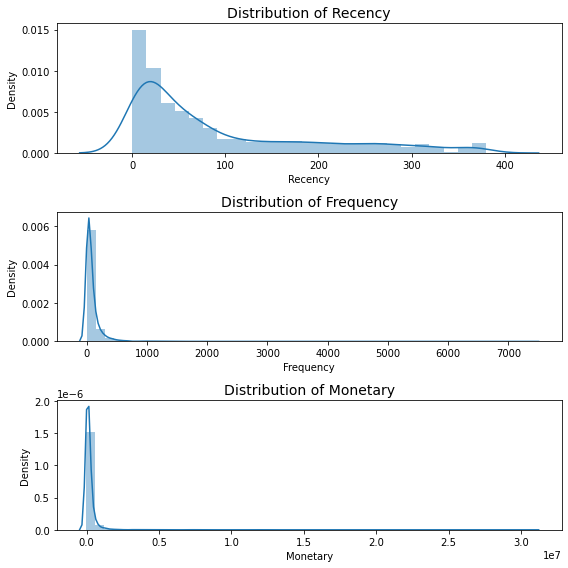

In [49]:
# Distribution of recency, frequency, monetary
fig, ax = plt.subplots(3, 1, figsize = (8, 8))
for idx, val in enumerate(rfm.drop('CustomerID', axis = 1)):
    sns.distplot(rfm[val], ax = ax[idx])
    ax[idx].set_title(f'Distribution of {val}', fontsize = 14)
plt.tight_layout()

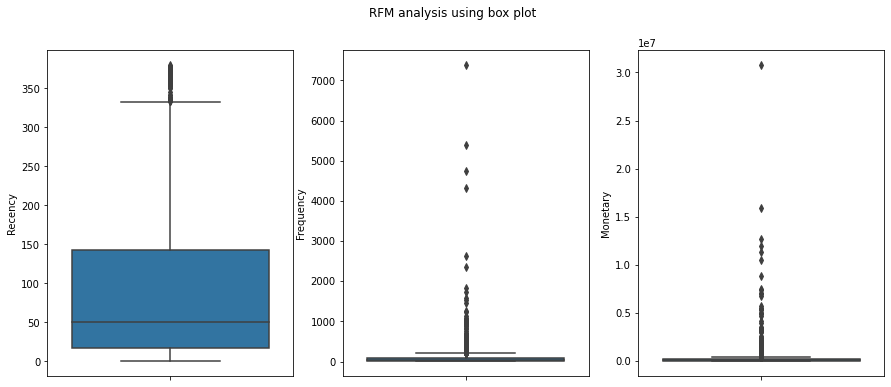

In [142]:
fig, axes = plt.subplots(1, 3, figsize=(15, 6))

fig.suptitle('RFM analysis using box plot')

sns.boxplot(ax=axes[0], data=rfm, y='Recency')
sns.boxplot(ax=axes[1], data=rfm, y='Frequency')
sns.boxplot(ax=axes[2], data=rfm, y='Monetary')

From the **boxplot analysis** it seems that:<br>
**Recency:** 100th percentile value comes under 330 above it are outliers.<br>
**Frequency:** 100th percentile value is somewhere around 400 so above that all are outliers.<br>
**Monetary:** 100th percentile value is somewhere around 0.2x10^7, above values are outliers


**Calculating RFM Score**

In [50]:
r_labels = range(4, 0, -1); f_labels = range(1, 5)

In [51]:
r_groups = pd.qcut(rfm['Recency'], q=4, labels=r_labels)

In [52]:
f_groups = pd.qcut(rfm['Frequency'], q=4, labels=f_labels)

In [53]:
rfm = rfm.assign(R = r_groups.values, F = f_groups.values)
rfm.head()

,CustomerID,Recency,Frequency,Monetary,R,F
0,2,3,149,459974.0,4,4
1,3,76,24,218956.0,2,2
2,4,18,64,158562.0,3,3
3,5,310,16,41976.0,1,1
4,6,36,79,144226.0,3,3


In [54]:
m_labels = range(1, 5)

In [55]:
m_groups = pd.qcut(rfm['Monetary'], q=4, labels=m_labels)

In [56]:
rfm = rfm.assign(M = m_groups.values)

In [59]:
#Created a function to concatenate three score based on quantile cut from 1 to 4 naming that column as RFM_Segment
def join_rfm(x): return str(x['R']) + str(x['F']) + str(x['M'])
rfm['RFM_Segment'] = rfm.apply(join_rfm, axis=1)
rfm['RFM_Segment'] = rfm['RFM_Segment'].astype(str)

In [60]:
rfm['RFM_Segment'].astype(int)

0       444
1       224
2       333
3       112
4       333
       ... 
4342    111
4343    111
4344    411
4345    444
4346    334
Name: RFM_Segment, Length: 4347, dtype: int64

In [61]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Segment
0,2,3,149,459974.0,4,4,4,444
1,3,76,24,218956.0,2,2,4,224
2,4,18,64,158562.0,3,3,3,333
3,5,310,16,41976.0,1,1,2,112
4,6,36,79,144226.0,3,3,3,333


In [62]:
#For Purchase Ratio creating ratio dataframe for Cancelled_Status
ratio = lc_36_data.groupby('CustomerID').agg({'Cancelled_status': lambda x: x.sum()})
ratio.columns

Index(['Cancelled_status'], dtype='object')

In [63]:
ratio.columns

Index(['Cancelled_status'], dtype='object')

In [64]:
#Renaming Cancelled_Status to ReturnedOrder
ratio.columns=['ReturnedOrder']

In [65]:
ratio

,ReturnedOrder
CustomerID,
2,0
3,0
4,0
5,0
6,6
...,...
4368,0
4369,0
4370,0


In [66]:
#Displaying the maximum no. of returnedorder
ratio['ReturnedOrder'].max()

186

In [67]:
#Finding the customer who returned this order for the maximum times
ratio[ratio['ReturnedOrder']==186]

,ReturnedOrder
CustomerID,
1896,186


In [68]:
#Resetting CustomerID index to column
ratio = ratio.rename_axis('CustomerID').reset_index()
ratio

,CustomerID,ReturnedOrder
0,2,0
1,3,0
2,4,0
3,5,0
4,6,6
...,...,...
4342,4368,0
4343,4369,0
4344,4370,0
4345,4371,0


In [69]:
#Joining rfm and ratio dataframe by CustomerID
concate_df = rfm.set_index('CustomerID').combine_first(ratio.set_index('CustomerID')).reset_index()
print (concate_df)

      CustomerID  F  Frequency  M  ...  R RFM_Segment Recency  ReturnedOrder
0              2  4        149  4  ...  4         444       3            0.0
1              3  2         24  4  ...  2         224      76            0.0
2              4  3         64  3  ...  3         333      18            0.0
3              5  1         16  2  ...  1         112     310            0.0
4              6  3         79  3  ...  3         333      36            6.0
...          ... ..        ... ..  ... ..         ...     ...            ...
4342        4368  1          9  1  ...  1         111     277            0.0
4343        4369  1          7  1  ...  1         111     180            0.0
4344        4370  1         11  1  ...  4         411       8            0.0
4345        4371  4        687  4  ...  4         444       3            0.0
4346        4372  3         67  4  ...  3         334      43            0.0

[4347 rows x 9 columns]


In [70]:
concate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4347 entries, 0 to 4346
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   CustomerID     4347 non-null   int64   
 1   F              4347 non-null   category
 2   Frequency      4347 non-null   int64   
 3   M              4347 non-null   category
 4   Monetary       4347 non-null   float64 
 5   R              4347 non-null   category
 6   RFM_Segment    4347 non-null   object  
 7   Recency        4347 non-null   int64   
 8   ReturnedOrder  4347 non-null   float64 
dtypes: category(3), float64(2), int64(3), object(1)
memory usage: 217.0+ KB


In [71]:
#Converting ReturnedOrder datatype from float to int
concate_df['ReturnedOrder'] = concate_df['ReturnedOrder'].astype(int)
concate_df.head()

,CustomerID,F,Frequency,M,Monetary,R,RFM_Segment,Recency,ReturnedOrder
0,2,4,149,4,459974.0,4,444,3,0
1,3,2,24,4,218956.0,2,224,76,0
2,4,3,64,3,158562.0,3,333,18,0
3,5,1,16,2,41976.0,1,112,310,0
4,6,3,79,3,144226.0,3,333,36,6


In [72]:
#Creating NoReturns Column
concate_df['NoReturns'] = concate_df['Frequency'] - concate_df['ReturnedOrder']
concate_df

,CustomerID,F,Frequency,M,Monetary,R,RFM_Segment,Recency,ReturnedOrder,NoReturns
0,2,4,149,4,459974.0,4,444,3,0,149
1,3,2,24,4,218956.0,2,224,76,0,24
2,4,3,64,3,158562.0,3,333,18,0,64
3,5,1,16,2,41976.0,1,112,310,0,16
4,6,3,79,3,144226.0,3,333,36,6,73
...,...,...,...,...,...,...,...,...,...,...
4342,4368,1,9,1,18916.0,1,111,277,0,9
4343,4369,1,7,1,10774.0,1,111,180,0,7
4344,4370,1,11,1,19465.0,4,411,8,0,11
4345,4371,4,687,4,259701.0,4,444,3,0,687


In [73]:
#Calculating Purchase_Power_Ratio
concate_df['Purchase_Power_Ratio'] = round((concate_df['NoReturns']/concate_df['Frequency']),2)
concate_df

,CustomerID,F,Frequency,M,Monetary,R,RFM_Segment,Recency,ReturnedOrder,NoReturns,Purchase_Power_Ratio
0,2,4,149,4,459974.0,4,444,3,0,149,1.00
1,3,2,24,4,218956.0,2,224,76,0,24,1.00
2,4,3,64,3,158562.0,3,333,18,0,64,1.00
3,5,1,16,2,41976.0,1,112,310,0,16,1.00
4,6,3,79,3,144226.0,3,333,36,6,73,0.92
...,...,...,...,...,...,...,...,...,...,...,...
4342,4368,1,9,1,18916.0,1,111,277,0,9,1.00
4343,4369,1,7,1,10774.0,1,111,180,0,7,1.00
4344,4370,1,11,1,19465.0,4,411,8,0,11,1.00
4345,4371,4,687,4,259701.0,4,444,3,0,687,1.00


In [74]:
#Displaying minimum Purchase_Power_Ratio
min(concate_df['Purchase_Power_Ratio'])

0.0

In [75]:
#Displaying maximum Frequency
max(concate_df['Frequency'])

7383

In [76]:
#TO find out the CustomerID who placed the maximum orders with all details
concate_df[concate_df['Frequency']==7383]

,CustomerID,F,Frequency,M,Monetary,R,RFM_Segment,Recency,ReturnedOrder,NoReturns,Purchase_Power_Ratio
4020,4043,4,7383,4,4857964.0,4,444,1,124,7259,0.98


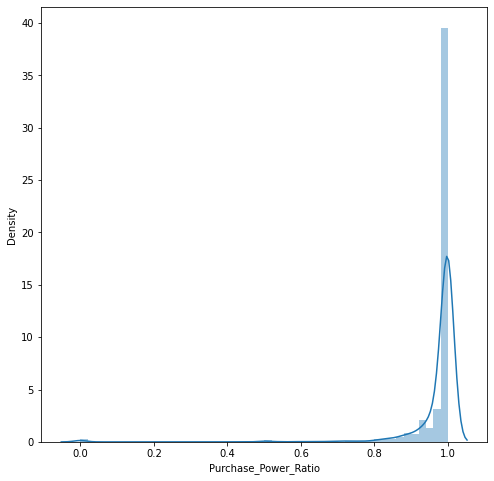

In [77]:
plt.figure(figsize=(8,8))
ax = sns.distplot(concate_df['Purchase_Power_Ratio'], hist=True)

From the distribution plot it shows that majorly **purchase power ratio** falls between **0.8 to 1.0.**

In [78]:
concate_df.describe()

,CustomerID,Frequency,Monetary,Recency,ReturnedOrder,NoReturns,Purchase_Power_Ratio
count,4347.000000,4347.000000,4.347000e+03,4347.000000,4347.000000,4347.000000,4347.000000
mean,2186.350587,86.577640,2.131625e+05,92.505176,1.729009,84.848631,0.973313
std,1261.302293,215.565898,7.729048e+05,100.829325,6.389576,211.834371,0.092694
min,2.000000,1.000000,-4.442600e+04,0.000000,0.000000,0.000000,0.000000
25%,1094.500000,16.000000,3.523500e+04,17.000000,0.000000,16.000000,0.980000
50%,2185.000000,39.000000,7.826000e+04,50.000000,0.000000,38.000000,1.000000
75%,3278.500000,95.000000,1.932235e+05,143.500000,1.000000,93.000000,1.000000
max,4372.000000,7383.000000,3.077583e+07,380.000000,186.000000,7259.000000,1.000000


In [79]:
#To know how many customers are under which purchase_power_ratio
concate_df['Purchase_Power_Ratio'].value_counts()

1.00    2937
0.99     292
0.98     210
0.97     159
0.96     113
0.95     112
0.94      68
0.93      59
0.92      57
0.89      41
0.91      37
0.88      30
0.00      25
0.90      25
0.83      25
0.87      22
0.86      18
0.85      13
0.50      13
0.84      10
0.82       8
0.81       8
0.80       8
0.75       7
0.72       6
0.69       4
0.60       4
0.64       4
0.70       4
0.79       4
0.71       3
0.67       3
0.76       3
0.54       2
0.78       2
0.77       2
0.73       2
0.58       1
0.55       1
0.62       1
0.68       1
0.52       1
0.29       1
0.40       1
Name: Purchase_Power_Ratio, dtype: int64

In [80]:
#Calculating Purchase_Power Score based on the above value counts and distribution
PP_score = []
for x in concate_df['Purchase_Power_Ratio']:
  if x == 1.00:
    PP_score.append(4)
  elif ((x>=0.97) & (x<1.00)):
    PP_score.append(3)
  elif ((x>=0.80) & (x<0.97)):
    PP_score.append(2)
  else:
    PP_score.append(1)

concate_df['PP_score']=PP_score

In [81]:
#Displaying first 5 rows after PP_score calculation
concate_df.head()

,CustomerID,F,Frequency,M,Monetary,R,RFM_Segment,Recency,ReturnedOrder,NoReturns,Purchase_Power_Ratio,PP_score
0,2,4,149,4,459974.0,4,444,3,0,149,1.00,4
1,3,2,24,4,218956.0,2,224,76,0,24,1.00,4
2,4,3,64,3,158562.0,3,333,18,0,64,1.00,4
3,5,1,16,2,41976.0,1,112,310,0,16,1.00,4
4,6,3,79,3,144226.0,3,333,36,6,73,0.92,2


In [82]:
concate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4347 entries, 0 to 4346
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   CustomerID            4347 non-null   int64   
 1   F                     4347 non-null   category
 2   Frequency             4347 non-null   int64   
 3   M                     4347 non-null   category
 4   Monetary              4347 non-null   float64 
 5   R                     4347 non-null   category
 6   RFM_Segment           4347 non-null   object  
 7   Recency               4347 non-null   int64   
 8   ReturnedOrder         4347 non-null   int64   
 9   NoReturns             4347 non-null   int64   
 10  Purchase_Power_Ratio  4347 non-null   float64 
 11  PP_score              4347 non-null   int64   
dtypes: category(3), float64(2), int64(6), object(1)
memory usage: 318.9+ KB


In [83]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4347 entries, 0 to 4346
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   CustomerID   4347 non-null   int64   
 1   Recency      4347 non-null   int64   
 2   Frequency    4347 non-null   int64   
 3   Monetary     4347 non-null   float64 
 4   R            4347 non-null   category
 5   F            4347 non-null   category
 6   M            4347 non-null   category
 7   RFM_Segment  4347 non-null   object  
dtypes: category(3), float64(1), int64(3), object(1)
memory usage: 183.0+ KB


In [84]:
rfm_count_unique = concate_df.groupby('RFM_Segment')['RFM_Segment'].nunique()
print(rfm_count_unique.sum())

62


In [85]:
#Creating a new column called Cust_Score
concate_df['Cust_Score'] = concate_df[['R','F','M', 'PP_score']].sum(axis=1)
print(concate_df['Cust_Score'].head())

0    16
1    12
2    13
3     8
4    11
Name: Cust_Score, dtype: int64


In [86]:
concate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4347 entries, 0 to 4346
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   CustomerID            4347 non-null   int64   
 1   F                     4347 non-null   category
 2   Frequency             4347 non-null   int64   
 3   M                     4347 non-null   category
 4   Monetary              4347 non-null   float64 
 5   R                     4347 non-null   category
 6   RFM_Segment           4347 non-null   object  
 7   Recency               4347 non-null   int64   
 8   ReturnedOrder         4347 non-null   int64   
 9   NoReturns             4347 non-null   int64   
 10  Purchase_Power_Ratio  4347 non-null   float64 
 11  PP_score              4347 non-null   int64   
 12  Cust_Score            4347 non-null   int64   
dtypes: category(3), float64(2), int64(7), object(1)
memory usage: 352.9+ KB


In [87]:
concate_df.head()

,CustomerID,F,Frequency,M,Monetary,R,RFM_Segment,Recency,ReturnedOrder,NoReturns,Purchase_Power_Ratio,PP_score,Cust_Score
0,2,4,149,4,459974.0,4,444,3,0,149,1.00,4,16
1,3,2,24,4,218956.0,2,224,76,0,24,1.00,4,12
2,4,3,64,3,158562.0,3,333,18,0,64,1.00,4,13
3,5,1,16,2,41976.0,1,112,310,0,16,1.00,4,8
4,6,3,79,3,144226.0,3,333,36,6,73,0.92,2,11


In [88]:
concate_df.describe()

,CustomerID,Frequency,Monetary,Recency,ReturnedOrder,NoReturns,Purchase_Power_Ratio,PP_score,Cust_Score
count,4347.000000,4347.000000,4.347000e+03,4347.000000,4347.000000,4347.000000,4347.000000,4347.000000,4347.000000
mean,2186.350587,86.577640,2.131625e+05,92.505176,1.729009,84.848631,0.973313,3.481481,10.976536
std,1261.302293,215.565898,7.729048e+05,100.829325,6.389576,211.834371,0.092694,0.825734,2.788346
min,2.000000,1.000000,-4.442600e+04,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000
25%,1094.500000,16.000000,3.523500e+04,17.000000,0.000000,16.000000,0.980000,3.000000,9.000000
50%,2185.000000,39.000000,7.826000e+04,50.000000,0.000000,38.000000,1.000000,4.000000,11.000000
75%,3278.500000,95.000000,1.932235e+05,143.500000,1.000000,93.000000,1.000000,4.000000,13.000000
max,4372.000000,7383.000000,3.077583e+07,380.000000,186.000000,7259.000000,1.000000,4.000000,16.000000


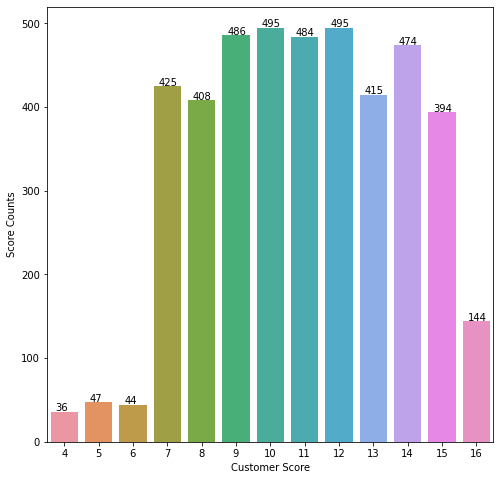

In [89]:
plt.figure(figsize=(8,8))
ax = sns.countplot(x=concate_df['Cust_Score'], data=concate_df)
plt.title("")
plt.xlabel('Customer Score')
plt.ylabel('Score Counts')
for p in ax.patches:
        ax.annotate('{:d}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

From this plot, majorly the customer lie in the **range of 7 to 15** in terms of the **overall customer score.**

In [90]:
#Defining a function for categoring customers in different levels based on their customer score
def cc_level(concate_df):
    if concate_df['Cust_Score'] >= 15:
        return 'Can\'t Loose Them'
    elif ((concate_df['Cust_Score'] >= 14) and (concate_df['Cust_Score'] < 15)):
        return 'Champions'
    elif ((concate_df['Cust_Score'] >= 13) and (concate_df['Cust_Score'] < 14)):
        return 'Loyal'
    elif ((concate_df['Cust_Score'] >= 12) and (concate_df['Cust_Score'] < 13)):
        return 'Highly Active'
    elif ((concate_df['Cust_Score'] >= 11) and (concate_df['Cust_Score'] < 12)):
        return 'Potential'
    elif ((concate_df['Cust_Score'] >= 10) and (concate_df['Cust_Score'] < 11)):
        return 'Good Interest'
    elif ((concate_df['Cust_Score'] >= 9) and (concate_df['Cust_Score'] < 10)):
        return 'Occassional Spendor'
    elif ((concate_df['Cust_Score'] >= 8) and (concate_df['Cust_Score'] < 9)):
        return 'Poorly Active'
    elif ((concate_df['Cust_Score'] >= 7) and (concate_df['Cust_Score'] < 8)):
        return 'Needs Attention'                            
    else:
        return 'Require Activation'

In [91]:
#Creating Customer Level column by applying all cc_level values based on customer score
concate_df['Customer_Level'] = concate_df.apply(cc_level, axis=1)

In [92]:
concate_df.head()

,CustomerID,F,Frequency,M,Monetary,R,RFM_Segment,Recency,ReturnedOrder,NoReturns,Purchase_Power_Ratio,PP_score,Cust_Score,Customer_Level
0,2,4,149,4,459974.0,4,444,3,0,149,1.00,4,16,Can't Loose Them
1,3,2,24,4,218956.0,2,224,76,0,24,1.00,4,12,Highly Active
2,4,3,64,3,158562.0,3,333,18,0,64,1.00,4,13,Loyal
3,5,1,16,2,41976.0,1,112,310,0,16,1.00,4,8,Poorly Active
4,6,3,79,3,144226.0,3,333,36,6,73,0.92,2,11,Potential


In [93]:
#To calculate actual mean and counts for each cc_level
cc_level_agg = concate_df.groupby('Customer_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'NoReturns': ['mean', 'count']
}).round(1)

In [94]:
print(cc_level_agg)

                    Recency Frequency  Monetary NoReturns      
                       mean      mean      mean      mean count
Customer_Level                                                 
Can't Loose Them       10.8     308.3  733588.1     305.4   538
Champions              22.7     163.0  455799.3     158.5   474
Good Interest          92.1      31.8   66810.8      31.0   495
Highly Active          54.3      64.4  146621.9      63.0   495
Loyal                  35.8      99.0  262620.5      96.3   415
Needs Attention       249.0      10.0   24553.6       9.6   425
Occassional Spendor   133.3      21.3   48962.8      20.8   486
Poorly Active         153.5      15.6   33984.9      14.9   408
Potential              74.6      45.7  105119.5      44.6   484
Require Activation    227.6      11.2   18005.6       8.3   127


In [95]:
cc_level_agg.columns = cc_level_agg.columns.droplevel()
cc_level_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean','NoReturnsMean','Count']

In [96]:
pip install squarify

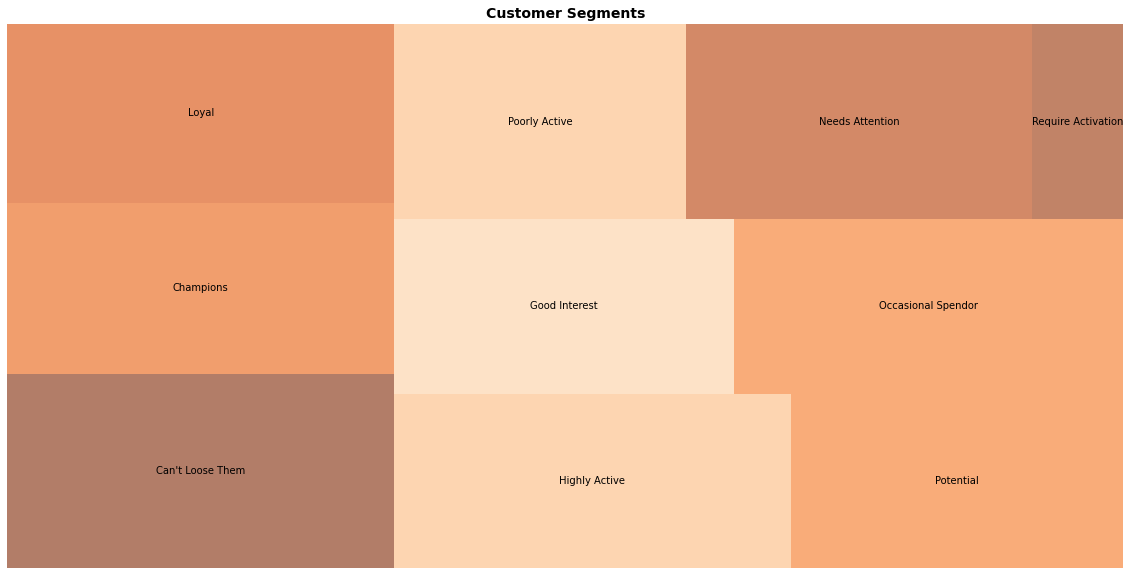

In [114]:
import squarify
import matplotlib
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(20, 10)
# Create a dataset:
my_values=concate_df.Cust_Score # 
 
# create a color palette, mapped to these values
cmap = matplotlib.cm.Oranges
mini=min(my_values)
maxi=max(my_values)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in my_values]
squarify.plot(sizes=cc_level_agg['Count'], 
              label=['Can\'t Loose Them',
                     'Champions',
                     'Loyal',
                     'Highly Active',
                     'Potential',
                     'Good Interest',
                     'Occasional Spendor',
                     'Poorly Active',
                     'Needs Attention',
                     'Require Activation'], alpha=.6 , color=colors)
plt.title("Customer Segments",fontsize=14,fontweight="bold")
plt.axis('off')
plt.show()

In [115]:
#Dropping unnecessary columns for proper scaling from the dataframe
scaled_df = concate_df.drop(['CustomerID', 'Customer_Level'], axis=1)
scaled_df.head()

,F,Frequency,M,Monetary,R,RFM_Segment,Recency,ReturnedOrder,NoReturns,Purchase_Power_Ratio,PP_score,Cust_Score
0,4,149,4,459974.0,4,444,3,0,149,1.00,4,16
1,2,24,4,218956.0,2,224,76,0,24,1.00,4,12
2,3,64,3,158562.0,3,333,18,0,64,1.00,4,13
3,1,16,2,41976.0,1,112,310,0,16,1.00,4,8
4,3,79,3,144226.0,3,333,36,6,73,0.92,2,11


In [116]:
#Performing Standard Scaling for each columns to have one equal scale
from sklearn.preprocessing import StandardScaler,normalize

scaler = StandardScaler()
data_scaled = scaler.fit_transform(scaled_df)
data_scaled = pd.DataFrame(data_scaled)
print(data_scaled)

            0         1         2   ...       9         10        11
0     1.348526  0.289608  1.341620  ...  0.28794  0.628021  1.801800
1    -0.434063 -0.290328  1.341620  ...  0.28794  0.628021  0.367093
2     0.457232 -0.104749  0.447275  ...  0.28794  0.628021  0.725770
3    -1.325357 -0.327444 -0.447070  ...  0.28794  0.628021 -1.067614
4     0.457232 -0.035156  0.447275  ... -0.57521 -1.794346  0.008416
...        ...       ...       ...  ...      ...       ...       ...
4342 -1.325357 -0.359920 -1.341414  ...  0.28794  0.628021 -1.426291
4343 -1.325357 -0.369199 -1.341414  ...  0.28794  0.628021 -1.426291
4344 -1.325357 -0.350641 -1.341414  ...  0.28794  0.628021 -0.350261
4345  1.348526  2.785651  1.341620  ...  0.28794  0.628021  1.801800
4346  0.457232 -0.090830  1.341620  ...  0.28794  0.628021  1.084446

[4347 rows x 12 columns]


In [117]:
#Normalizing data for values for 0 to 1 for distance calculation.
norm=normalize(data_scaled)

In [118]:
#Creating normalized dataframe for clustering
df_norm=pd.DataFrame(norm)

**K-Means Clustering**

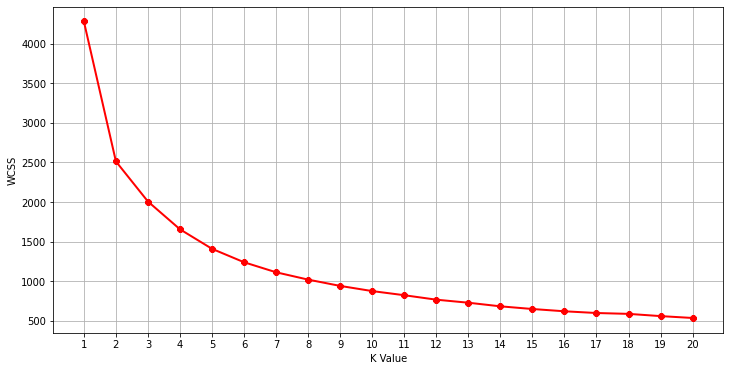

In [121]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,21):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df_norm.iloc[:,0:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,21),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,21,1))
plt.ylabel("WCSS")
plt.show()

The elbow plot shows that the K values from **5 to 7** are optimal values for clustering.

In [120]:
from sklearn import metrics
for i in range(2,11):
  kmeans_labels=KMeans(n_clusters=i,random_state=123).fit_predict(df_norm)     
  print("Silhouette score for {} clusters k-means : {} ".format(i,metrics.silhouette_score(df_norm,kmeans_labels, metric='euclidean').round(3)))
  print('Davies Bouldin Score:'+str(metrics.davies_bouldin_score(df_norm,kmeans_labels).round(3)))

Silhouette score for 2 clusters k-means : 0.381 
Davies Bouldin Score:1.12
Silhouette score for 3 clusters k-means : 0.346 
Davies Bouldin Score:1.147
Silhouette score for 4 clusters k-means : 0.356 
Davies Bouldin Score:1.092
Silhouette score for 5 clusters k-means : 0.365 
Davies Bouldin Score:1.062
Silhouette score for 6 clusters k-means : 0.335 
Davies Bouldin Score:1.099
Silhouette score for 7 clusters k-means : 0.32 
Davies Bouldin Score:1.131
Silhouette score for 8 clusters k-means : 0.312 
Davies Bouldin Score:1.155
Silhouette score for 9 clusters k-means : 0.316 
Davies Bouldin Score:1.126
Silhouette score for 10 clusters k-means : 0.323 
Davies Bouldin Score:1.133


From the above performed KMeans algorithm, the cluster nos. whose **Silhouette as well as David Bouldin score** are good enough are **5,6,7** and **10** respectively.

In [122]:
kmeans_labels=KMeans(n_clusters=5,random_state=123).fit_predict(df_norm)

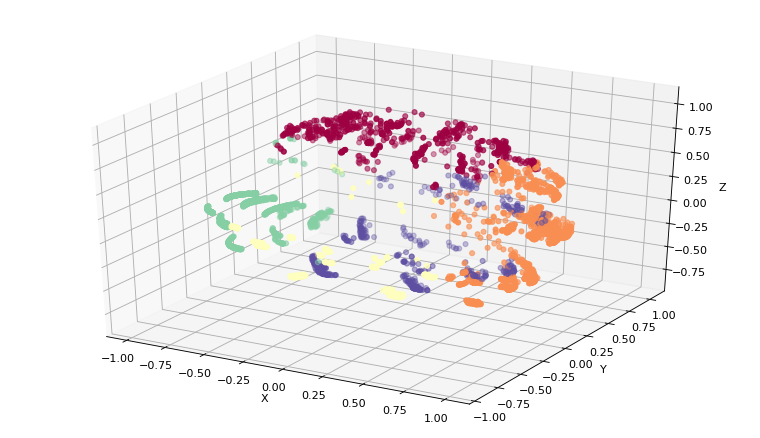

In [123]:
pca = PCA(n_components=3).fit_transform(df_norm)
fig = plt.figure(figsize=(12, 7), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")
ax.scatter3D(pca.T[0],pca.T[1],pca.T[2],c=kmeans_labels,cmap='Spectral')

xLabel = ax.set_xlabel('X')
yLabel = ax.set_ylabel('Y')
zLabel = ax.set_zlabel('Z')

**Mini Batch K-Means**

In [124]:
for i in range(2,11):
    minikm_labels = MiniBatchKMeans(n_clusters=i,init='random',batch_size=100000).fit_predict(df_norm)
    print("Silhouette score for {} clusters MiniBatch k-means : {}".format(i,metrics.silhouette_score(df_norm, minikm_labels, metric='euclidean').round(3)))
    print('Davies Bouldin Score:'+str(metrics.davies_bouldin_score(df_norm,minikm_labels).round(3)))

Silhouette score for 2 clusters MiniBatch k-means : 0.38
Davies Bouldin Score:1.135
Silhouette score for 3 clusters MiniBatch k-means : 0.346
Davies Bouldin Score:1.146
Silhouette score for 4 clusters MiniBatch k-means : 0.356
Davies Bouldin Score:1.088
Silhouette score for 5 clusters MiniBatch k-means : 0.285
Davies Bouldin Score:1.241
Silhouette score for 6 clusters MiniBatch k-means : 0.341
Davies Bouldin Score:1.176
Silhouette score for 7 clusters MiniBatch k-means : 0.287
Davies Bouldin Score:1.147
Silhouette score for 8 clusters MiniBatch k-means : 0.311
Davies Bouldin Score:1.231
Silhouette score for 9 clusters MiniBatch k-means : 0.316
Davies Bouldin Score:1.168
Silhouette score for 10 clusters MiniBatch k-means : 0.322
Davies Bouldin Score:1.172


From the above analysis done by **Mini Batch K-Means** it seems that both the scores are good with cluster numbers **4,6,9 and 10**, where **6** seems to be the best fit cluster.

In [126]:
minikm_labels = MiniBatchKMeans(n_clusters=6,init='random',batch_size=100000).fit_predict(df_norm)

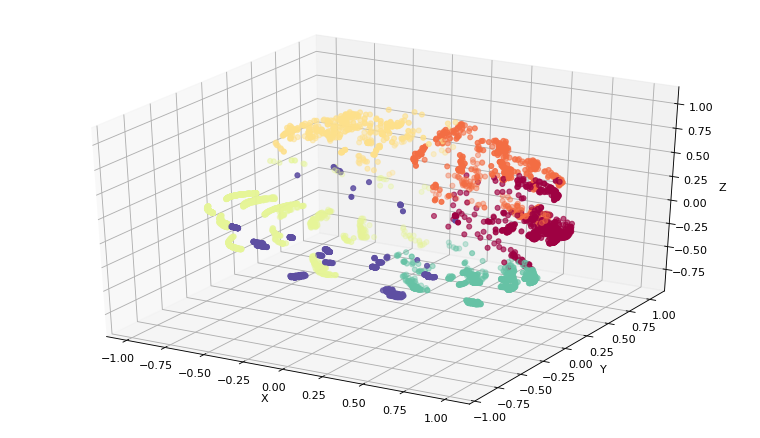

In [127]:
fig = plt.figure(figsize=(12, 7), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")
ax.scatter3D(pca.T[0],pca.T[1],pca.T[2],c=minikm_labels,cmap='Spectral')

xLabel = ax.set_xlabel('X')
yLabel = ax.set_ylabel('Y')
zLabel = ax.set_zlabel('Z')

**Hierarchical Clustering**

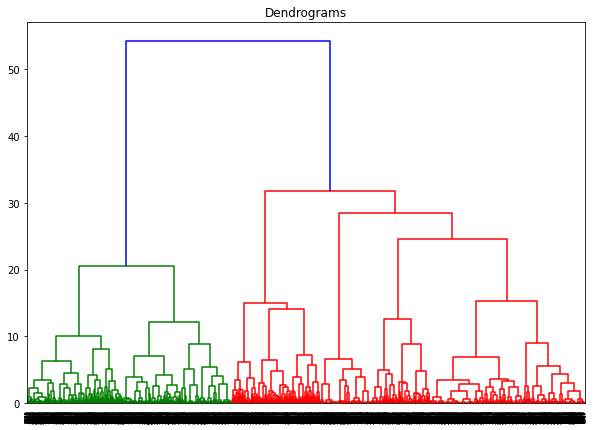

In [128]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_norm, method='ward'))

In [129]:
hcluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
hcp=hcluster.fit_predict(df_norm)
print('Silhouette Score for Hieararchial Clustering:'+str(metrics.silhouette_score(df_norm,hcp,metric='euclidean')))
print('Davies Bouldin Score:'+str(metrics.davies_bouldin_score(df_norm,hcp)))

Silhouette Score for Hieararchial Clustering:0.32585613012471804
Davies Bouldin Score:1.2077870516174731


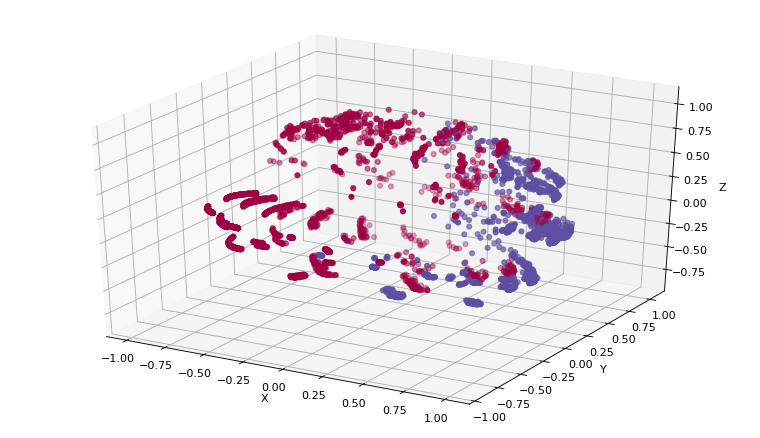

In [130]:
fig = plt.figure(figsize=(12, 7), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")
ax.scatter3D(pca.T[0],pca.T[1],pca.T[2],c=hcp,cmap='Spectral')

xLabel = ax.set_xlabel('X')
yLabel = ax.set_ylabel('Y')
zLabel = ax.set_zlabel('Z')

From the **hierarchical clustering**, using it seems that this has **misclassified many datapoints** and not appropriate for this dataset, with just **2 clusters.**

**DBSCAN Algorithm**

In [131]:
results=pd.DataFrame(columns=['Eps','Min_Samples','Number of Cluster','Silhouette Score'])
for i in range(1,12):
  for j in range(1,12):
      dbscan_cluster = DBSCAN(eps=i*0.2, min_samples=j)
      clusters=dbscan_cluster.fit_predict(df_norm)
      if len(np.unique(clusters))>2:
          results=results.append({'Eps':i*0.2,
                        'Min_Samples':j,
                        'Number of Cluster':len(np.unique(clusters)),
                        'Silhouette Score':metrics.silhouette_score(df_norm,clusters),
                        'Davies Bouldin Score':metrics.davies_bouldin_score(df_norm,clusters)}, ignore_index=True)

In [132]:
results.sort_values('Silhouette Score',ascending=False)

,Eps,Min_Samples,Number of Cluster,Silhouette Score,Davies Bouldin Score
3,0.2,4.0,113.0,0.452090,1.053125
1,0.2,2.0,154.0,0.448080,1.066554
2,0.2,3.0,126.0,0.447247,1.063857
0,0.2,1.0,257.0,0.441897,0.636333
5,0.2,6.0,96.0,0.441236,1.102415
4,0.2,5.0,97.0,0.440198,1.089276
6,0.2,7.0,84.0,0.423881,1.103213
7,0.2,8.0,83.0,0.419978,1.085120
8,0.2,9.0,80.0,0.409488,1.082304
9,0.2,10.0,75.0,0.393941,1.063813


It seems that **DBSCAN** is the **worst algorithm for this dataset**, though the two scores are good but the number of clusters are very high. Hence **not taking this for further comparison result and EDA.**

**Mean-Shift**

In [133]:
est_bandwidth = estimate_bandwidth(df_norm,quantile=0.1,n_samples=10000)
mean_shift = MeanShift(bandwidth= est_bandwidth, bin_seeding=True).fit(df_norm)
labels_unique=np.unique(mean_shift.labels_)
n_clusters_=len(labels_unique)
print("Number of estimated clusters : %d" % n_clusters_)

Number of estimated clusters : 6


In [134]:
print('Silhouette Score for MeanShift:'+str(metrics.silhouette_score(df_norm,mean_shift.labels_,metric='euclidean').round(3)))
print('Davies Bouldin Score for MeanShift:'+str(metrics.davies_bouldin_score(df_norm,mean_shift.labels_).round(3)))

Silhouette Score for MeanShift:0.345
Davies Bouldin Score for MeanShift:1.158


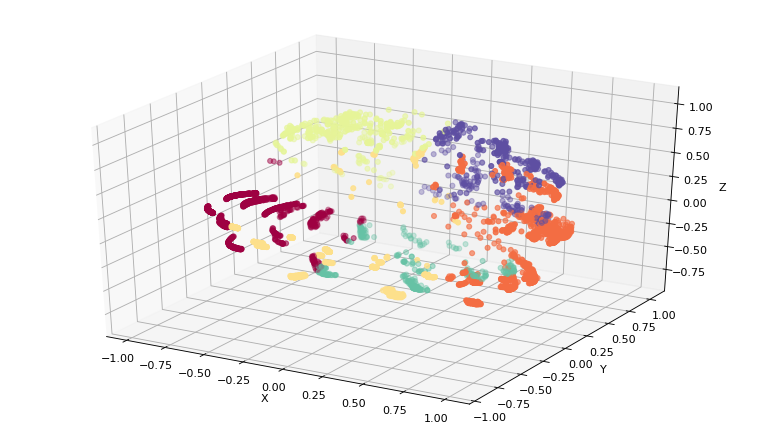

In [135]:
fig = plt.figure(figsize=(12, 7), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")
ax.scatter3D(pca.T[0],pca.T[1],pca.T[2],c=mean_shift.labels_, cmap='Spectral')

xLabel = ax.set_xlabel('X')
yLabel = ax.set_ylabel('Y')
zLabel = ax.set_zlabel('Z')

**Comparing Results of all clustering Algorithms**

In [136]:
algorithms=["K-Means","MiniBatch K-Means","Hierarchical Clustering","MeanShift"]

# Silhouette Score
ss=[metrics.silhouette_score(df_norm,kmeans_labels),metrics.silhouette_score(df_norm,minikm_labels),metrics.silhouette_score(df_norm,hcp),
    metrics.silhouette_score(df_norm,mean_shift.labels_)]

# Davies Bouldin Score
db=[metrics.davies_bouldin_score(df_norm,kmeans_labels),metrics.davies_bouldin_score(df_norm,minikm_labels),metrics.davies_bouldin_score(df_norm,hcp),
   metrics.davies_bouldin_score(df_norm,mean_shift.labels_)]

In [137]:
comprsn={"Algorithms":algorithms,"Davies Bouldin":db,"Silhouette Score":ss}
compdf=pd.DataFrame(comprsn)
display(compdf.sort_values(by=["Silhouette Score"], ascending=False))

,Algorithms,Davies Bouldin,Silhouette Score
0,K-Means,1.061520,0.364929
3,MeanShift,1.157732,0.344566
2,Hierarchical Clustering,1.207787,0.325856
1,MiniBatch K-Means,1.367538,0.307089


From the comparison result of all 4 clustering algorithm, it shows that **K-Means performs better** than the rest.

In [138]:
concate_df['Clusters']=list(kmeans_labels)
customers=pd.DataFrame(concate_df['Clusters'].value_counts()).rename(columns={'Clusters':'Number of Customers'})
customers.T

,1,3,2,0,4
Number of Customers,1326,1259,662,566,534


The above table shows **segmentation of customers** with respect to **5 clusters** based on **K-Means** considering it as the optimized algorithm for clustering for this dataset.

In [ ]:
concate_df.set_index('Clusters')
grouped=concate_df.groupby(by='Clusters').mean().round(1)
grouped

,CustomerID,Frequency,Monetary,Recency,ReturnedOrder,NoReturns,Purchase_Power_Ratio,PP_score,Cust_Score
Clusters,,,,,,,,,
0,2091.4,41.3,115648.9,113.8,4.5,36.7,0.8,1.9,8.5
1,2155.3,203.0,514080.5,16.7,3.6,199.4,1.0,3.3,14.2
2,2301.8,27.8,50008.5,24.0,0.0,27.7,1.0,4.0,10.9
3,2250.5,18.2,38869.8,191.8,0.0,18.2,1.0,4.0,8.4
4,2069.7,79.5,182484.6,108.8,0.3,79.2,1.0,3.8,11.9


The above table shows the **actual mean of Cust_Score** so from there we can come to know in **which cluster customer with their respective scores are divided.**

**Conclusion:** From the comparison of **manual and machine learning models** summing up it seems ecommerce company at present can segment their customers into **5 different categories.**